# Projeto 2 - Ciência dos Dados

Nome:Luís Filipe Loureiro

Nome: João Bueno


___
##         Classificador automático de sentimento do modelo Golf da Volkswagen                                    


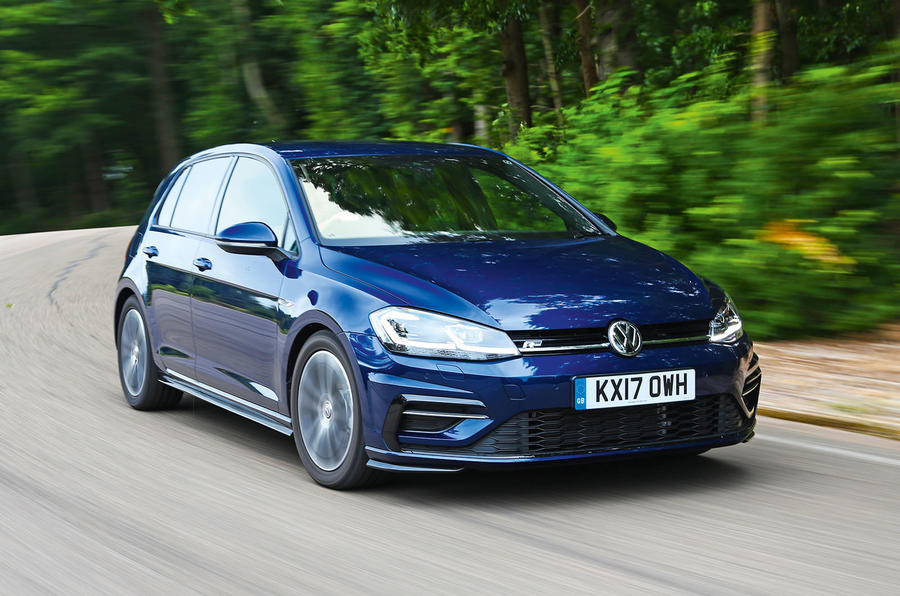

### Introdução

O presente estudo tem como objetivo criar um machine learning que, por meio do Teorema probabilístico de Bayes, consegue classificar um tweet quanto a sua relevância. O foco de estudo foi o carro Golf da marca Volkswagen, tentou-se criar um modelo que identifica aquelas mensagens que revelam a visão dos consumidores sobre o produto, seja no sentido de criticá-lo, seja no sentido de manifestar um desejo de adquiri-lo ou vendê-lo.

Para isso foi importado 750 tweets por meio de uma conta developer no Twitter e analisado um por um quanto ao sua relevância. O critério de exploração foi o seguinte: o tweet recebeu valor 0, ou seja, irrelevante, quando se referia ao esporte golf; recebeu o valor 1, ou seja, neutro aquele tweet relacionado ao carro, mas que não exprimia qualquer juízo de valor e recebeu o valor 2, ou seja, relevante aquele que expunha uma visão do mercado sobre o produto. Para deixar mais claro o critério de avaliação, apresenta-se exemplos de tweets avaliados:
    - "Queria jogar golf", classificado como irrelevante [0]
    - "Trouxe o golf lá da casa do Victor", classificado como neutro [1]
    - "Estou apaixonada pelo golf que vão lançar", classificado como relevante [2]
    
Dos 750 tweets importados, 500 foram utilizados para identificação de um padrão por meio do Teorema de Bayes e nos 250 restantes foi aplicado o machine learning e comparado os resultados.


### Importando as bibliotecas necessárias

In [10]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
import numpy as np

___
### Autenticando no  Twitter

* Conta: @luisfloureiro1

In [6]:
with open('auth.pass') as fp:    
    data = json.load(fp)

auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

___
### Coleta de tweets e salvando-os em um arquivo Excel

A base de dados que serviu como teste dispunha de 500 tweets, e as 250 mensagens restantes foram inseridas no machine learning para serem testadas e comparadas. Entretanto, quando foi coletado os dados percebeu-se que havia uma alta incidência de tweets repetidos (rt), dessa maneira, foi preciso apagar aquelas mensagens repetidas da base de dados. É por essa razão que o total de tweets coletados foi maior que 750, no caso, 1600.

In [7]:
produto = 'Golf'
n = 1600
t = 500
lang = 'pt'

In [8]:
api = tweepy.API(auth)
i = 1
msgs = []
for msg in tweepy.Cursor(api.search, q=produto, lang=lang, tweet_mode="extended").items():    
    msgs.append(msg.full_text.lower())
    i += 1
    if i > n:
        break
shuffle(list(set(msgs)))


In [ ]:
if not os.path.isfile('./{0}.xlsx'.format(produto)):

    writer = pd.ExcelWriter('{0}.xlsx'.format(produto))

    
    dft = pd.DataFrame({'Treinamento' : pd.Series(list(set(msgs))[:t])})
    dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

    dfc = pd.DataFrame({'Teste' : pd.Series(list(set(msgs))[t:])})
    dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

    writer.save()

___
### Retirando a pontuação dos tweets coletados



In [11]:
#Para não ser mais necessário conectar-se ao twitter
tweets= pd.read_excel('Golf.xlsx')


In [12]:
valores=[]

for valor in tweets.loc[:,"Relevancia"]:
    valores.append(valor)


In [13]:
import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    import string
    punctuation = '[!-.:?;/@]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

In [14]:
clean_treinamento=[]
for tweet in tweets.loc[:,"Treinamento"]:
    clean_treinamento.append((cleanup(tweet)))

    
        
# clean_treinamento

In [15]:
tweets_clean =pd.DataFrame(clean_treinamento)
tweets_clean.loc[:,"Relevancia"]=1

In [16]:
#Adicionando a coluna relevancia
for numero in np.arange(0,500):
    tweets_clean.loc[numero,"Relevancia"]=valores[numero]

tweets_clean.columns=["tweet","Relevancia"]


###  Retirando espaços duplos dos tweets coletados

In [17]:
#Retirando double spaces
for numero in np.arange(0,500):
    tweets_clean.loc[numero,"tweet"]=re.sub(' +', ' ',tweets_clean.loc[numero,"tweet"])
    tweets_clean.loc[numero,"tweet"]=tweets_clean.loc[numero,"tweet"].strip()


### Manipulação dos dados para inserir no Teorema de Bayes

In [18]:
irrelevantes=tweets_clean.loc[tweets_clean.Relevancia==0]

neutros=tweets_clean.loc[tweets_clean.Relevancia==1]

relevantes=tweets_clean.loc[tweets_clean.Relevancia==2]

### Obtendo frequência relativa e frequência relativa das palavras em cada espaço amostral; relevante, neutro e irrelevante

In [19]:
N=[]
for neutro in neutros.tweet:
    N.append(neutro)

N01=','.join(N)
serie_neutro=pd.Series(N01.split())
tabela_neutro=serie_neutro.value_counts()
tabela_neutro_relativa = serie_neutro.value_counts(True)

In [20]:
I=[]
for irrelevante in irrelevantes.tweet:
    I.append(irrelevante)
    
I01=','.join(I)
serie_irrelevante=pd.Series(I01.split())
tabela_irrelevante=serie_irrelevante.value_counts()
tabela_irrelevante_relativa = serie_irrelevante.value_counts(True)




In [21]:
R=[]
for relevante in relevantes.tweet:
    R.append(relevante)
    
R01=','.join(R)
serie_relevante=pd.Series(R01.split())
tabela_relevante=serie_relevante.value_counts()
tabela_relevante_relativa = serie_relevante.value_counts(True)

### Criando variável que recebe o total sem repetição das palavras contidas nos tweets já classificados. Tal variável entrará no denominador do Teorema de Bayes

In [22]:

total2=len(tabela_neutro)+len(tabela_irrelevante)+len(tabela_relevante)

### Intersecção entre os conjuntos. Feito por questão de análise, não entra no Teorema de Bayes

In [ ]:
set_neutro= set(tabela_neutro_relativa.index)
set_irrelevante= set(tabela_irrelevante_relativa.index)
set_relevante= set(tabela_relevante_relativa.index)
int = set_neutro.intersection(set_irrelevante)

In [ ]:
inter=set_relevante.intersection(int)
#inter

### Retirada da pontuação e acentos duplos do conjunto de tweets do Teste


In [36]:
xls = pd.ExcelFile('Golf.xlsx')
teste1 = pd.read_excel(xls, 'Teste')

In [38]:
clean_teste=[]
classificacao=[]

for valor in teste1.loc[:,"Relevancia"]:
    classificacao.append(valor)

for tweet in teste1.loc[:,"Teste"]:
    clean_teste.append((cleanup(tweet)))

teste_clean=pd.DataFrame(clean_teste)
teste_clean.loc[:,"Relevancia"]=1
for numero in np.arange(0,250):
    teste_clean.loc[numero,"Relevancia"]=classificacao[numero]

teste_clean.columns=["tweet","Relevancia"]


In [45]:
for numero in np.arange(0,250):
    tweets_clean.loc[numero,"tweet"]=re.sub(' +', ' ',tweets_clean.loc[numero,"tweet"])
    tweets_clean.loc[numero,"tweet"]=tweets_clean.loc[numero,"tweet"].strip()



___
### Criando o  Classificador Naive-Bayes


Tendo em vista o Teorma de Bayes (apresentado abaixo), foi possível obter as probabilidades de uma sentença pertencer ao grupo irrelevante, neutro ou relevante

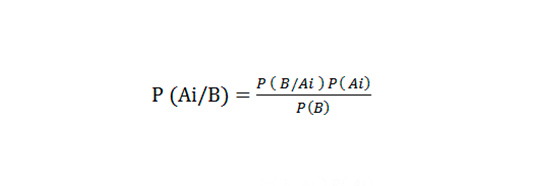

In [40]:
teste=[]


for frase in teste_clean.loc[:,"tweet"]:    
    frase1=frase.lower()
    frase3=pd.Series(frase1.split())
    lista_frase=list(frase3)
    irrelevante=1
    neutro=1
    relevante=1

    for word in lista_frase:


        if word not in tabela_irrelevante:
            irrelevante*=1/((total2+len(tabela_irrelevante)))

        else:
            irrelevante*=(tabela_irrelevante[word]+1)/(total2+len(tabela_irrelevante))

        if word not in tabela_neutro:
            neutro*=1/((total2+len(tabela_neutro)))
        else:
            neutro*=(tabela_neutro[word]+1)/(total2+len(tabela_neutro))

        if word not in tabela_relevante:
            relevante*=1/((total2+len(tabela_relevante)))
        else:
            relevante*=(tabela_relevante[word]+1)/(total2+len(tabela_relevante))

    P_I=(len(I)/total2)
    P_N=(len(N)/total2)
    P_R=(len(R)/total2)
    irrelevante*P_I
    neutro*P_N
    relevante*P_R
    
    if irrelevante>neutro and irrelevante>relevante:
        teste.append(0)
        
    elif relevante>irrelevante and relevante>neutro:
        teste.append(1)
    elif neutro>irrelevante and neutro>relevante:
        teste.append(2) 


### LaPlace Smoothing

É fundamental ressaltar que no cáculo da probabilidade foi considerado o LaPlace Smoothing. Esse método de manipulação numérico atribui valores probabilístico a tweets que apresentam palavras que não estão contidas nas mensagens que serviram como treinamento e, dessa maneira, não foram avaliadas no banco de dados.

A forma do LaPlace Smoothing está exposta abaixo:

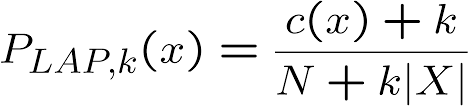

___
### Verificando a performance do Machine Larning

Criando a coluna que contém a classificação obtidas por meio do Teorema de Bayes

In [51]:
for numero in np.arange(0,251):
    teste_clean.loc[numero,"Teste"]=teste[numero]

In [53]:
teste_clean.head(10)

,tweet,Relevancia,Teste
0,um mano acabou de espetar o seu golf no muro k...,1,2.0
1,eu amo o golf ♡ https t co ugqfnhyznh,2,0.0
2,esmuellert_ david_alaba ainda bem que não fa...,0,0.0
3,caramba tequion e os dramas q vc me prometeu m...,0,0.0
4,bazert eu vou jogar golf,0,0.0
5,os cara da oficina não me conhece nem pelo nom...,1,0.0
6,golf por tornado messiiiiii,0,0.0
7,comprei uma camiseta da golf ficou enorme em m...,0,0.0
8,spoiler de it a coisa \n\n bill entra n...,0,0.0
9,rt kanandaap_ aqui no iff deveria ter aquele...,0,0.0


### Crosstab com a classficação obtida por meio do Machine Learning e classificação feita a mão

A diagonal principal indica a frequência de acerto em cada classificação

In [43]:
ct = pd.crosstab(teste_clean.Relevancia, teste_clean.Teste)
ct

Teste,0.0,1.0,2.0
Relevancia,,,
0,136,9,6
1,35,11,6
2,25,21,0


In [128]:
print("A média de acerto do Machine é de: {0} %".format(100*(136+11+0)/250))


A média de acerto do Machine é de: 58.8 %


##### Análise para os tweets relevantes:


In [127]:
rele_irre=round(ct.loc[2,0.0]/(ct.loc[2,0.0]+ct.loc[2,1.0]+ct.loc[2,2.0]),4)
rele_neutro=round(ct.loc[2,1.0]/(ct.loc[2,0.0]+ct.loc[2,1.0]+ct.loc[2,2.0]),4)
rele_rele=round(ct.loc[2,2.0]/(ct.loc[2,0.0]+ct.loc[2,1.0]+ct.loc[2,2.0]),4)

print("{0}% dos tweets relevantes foram classificados como irrelevantes-falso irrelevante".format(rele_irre*100))
print("{0}% dos tweets relevantes foram classificados como neutros-falso neutro".format(rele_neutro*100))
print("{0}% dos tweets relevantes foram classificados como relevantes- acerto".format(rele_rele*100))

54.35% dos tweets relevantes foram classificados como irrelevantes-falso irrelevante
45.65% dos tweets relevantes foram classificados como neutros-falso neutro
0.0% dos tweets relevantes foram classificados como relevantes- acerto


##### Análise para os tweets neutros:

In [124]:
neutro_irre=round(ct.loc[1,0.0]/(ct.loc[1,0.0]+ct.loc[1,1.0]+ct.loc[1,2.0]),4)
neutro_neutro=round(ct.loc[1,1.0]/(ct.loc[1,0.0]+ct.loc[1,1.0]+ct.loc[1,2.0]),4)
neutro_rele=round(ct.loc[1,2.0]/(ct.loc[1,0.0]+ct.loc[1,1.0]+ct.loc[1,2.0]),3)

print("{0}% dos tweets neutros foram classificados como irrelevantes-falso irrelevante".format(neutro_irre*100))
print("{0}% dos tweets neutros foram classificados como neutros-acerto".format(neutro_neutro*100))
print("{0}% dos tweets neutros foram classificados como relevantes-falso relevante".format(neutro_rele*100))

67.31% dos tweets neutros foram classificados como irrelevantes-falso irrelevante
21.15% dos tweets neutros foram classificados como neutros-acerto
11.5% dos tweets neutros foram classificados como relevantes-falso relevante


##### Análise para os tweets irrelevantes:

In [118]:
irre_irre=round(ct.loc[0,0.0]/(ct.loc[0,0.0]+ct.loc[0,1.0]+ct.loc[0,2.0]),4)
irre_neutro=round(ct.loc[0,1.0]/(ct.loc[0,0.0]+ct.loc[0,1.0]+ct.loc[0,2.0]),4)
irre_rele=round(ct.loc[0,2.0]/(ct.loc[0,0.0]+ct.loc[0,1.0]+ct.loc[0,2.0]),3)


print("{0}% dos tweets irrelevantes foram classificados como relevantes-acerto".format(irre_irre*100))
print("{0} % dos tweets irrelevantes foram classsificados erroneamente como neutro- falso neutro".format(irre_neutr*100))
print("{0}% dos tweets irrelevantes foram classificados como relevantes-falso relevante".format(irre_rele*100))

90.07% dos tweets irrelevantes foram classificados como relevantes-acerto
6.0 % dos tweets irrelevantes foram classsificados erroneamente como neutro- falso neutro
4.0% dos tweets irrelevantes foram classificados como relevantes-falso relevante


___
### Questões acerca do Projeto

#### Por que não se  pode usar o próprio classificador para gerar mais amostras de treinamento?

A utilização do machine learning para gerar mais amostras de treinamento seria problemático devido a um conjunto de questôes. A primeira a ser levantada é o fato de que as classificações contidas na base de dados treinamento deve ser isenta de erros, pois é partir dela que o classificador identifica um padrão a ser aplicado no conjunto teste. Destarte, ao inserir o machine learning no treinamento a tendência é intensificar a ocorrência de falso positivos e falso negativos. Utilizando o classificador desse Projeto como exemplo que apresentou uma taxa de acerto de 60%, de 100 novos tweets da base de dados treinamento, em média, 40 que serão usados pelo classificador para estabelecer um padrão foram mal classificados e, assim, irão contaminar, a classificação.

Apesar do fato de que um aumento na quantidade de tweets na amostra de treinamento seria benéfico para uma melhor performace do classificador, é necessário partir do ponto de partida que essas novas mensagens têm sua classificação correta, algo improvável quando se é utilizado o classificador.

Um segundo ponto é que a amostra de treinamento foi utilizada para "ensinar" o classificador, portanto, passar as mesmas amostras pelo machine learning não seria eficaz, tampouco produziria resultado, pois o programa não iria cumpria a sua função de classificar novos tweets.

#### Proponha novos cenários para o classificador Naive Bayes.

A utilização de um Machine Learning que consegue prever a ocorrência de um evento a partir de um conjunto de informações pode ter funcionalidade em diferentes áreas comerciais. 

Uma possibilidade é na área de seguros para carros. Para um mesmo modelo de carro, preços diferentes de seguros podem ser propostos pela seguradora; e isso se deve a fatores contextuais que afetam na probabilidade de risco em relação a um veículo. Uma questão muito presente na vida de jovens na faixa dos 18 anos é ganhar o seu primeiro carro e um dos fatores que dificultam  essa obtenção é o enorme acréscimo no preço a ser pago mensalmente para seguradora quando se anuncia que um jovem é um dos condutores do veículo. Isso se deve ao fato de que, dentro do universo das batidas de carro, os jovens são responsáveis por uma parcela considerável. Portanto, poderia ser utilizado o Teorema de Bayes para, a partir de uma base de dados, conseguir prever a probabilidade de uma batida de carro ser decorrente da inexperiência do condutor e, assim, aumentar o preço do seguro para determinada faixa de idade.

Uma segunda possibilidade, dessa vez mais próxima a esse projeto, é a utilização de um Machine Learning para aplicativos de venda online de livros. A partir dos livros já lidos e apreciados pelo cliente poderia ser empregado o Teorema de Bayes para prever quais outros livros poderiam ser adquiridos e apreciados pelo comprador.

#### Como são tratados os tweets de dupla negação e sarcasmo?

Os tweets sarcásticos têm um efeito negativo na taxa de acerto do classificador. Os tweets classificados como relevantes [2] apresentam algum juízo de valor ou visão do mercado acerca do produto, dessa maneira, o classificador entende um padrão que os tweets assim classificados manifestam. Mensagens sacásticas pode ter uma escolha de palavras peculiar ou mesmo as críticas sobre o produto não estão expostas de forma literal e, assim, o classificador irá remetê-la como irrelevante ou neutra. Destarte, o sarcasmo influencia na escolha de palavras da mensagem, a diferenciando de um juízo de valor claro, levando, dessa maneira, o classificador ao erro.

Como o projeto foca sobre a visão de mercado sobre o Golf e não tem em seu escolpo uma questão de verdadeiro ou falso, a dupla negação não tem influência na classificação.

#### Por que deve a empresa deve continuar financiando esse trabalho?

Apesar do fato de a taxa de acerto não ser um número ideal, 60%, acreditamos que tal valor tende a crescer fortemente se aumentado o número de tweets no treinamento. Assim, parte de um futuro orçamento seria destinado a aumentar a média de acerto vertiginosamente.

Ademais, o grupo pretende expandir o projeto para outros países. A Volkswagen é uma empresa global e assim deve ser esse trabalho. Pensamos que não devemos mais nos limitar a lingua portuguesa e analisar tweets de diversos lugares do mundo. Dessa maneira, seria possível indicar qual país apresenta um maior entusiamos pelo produto e, portanto, onde a empresa deveria focar, onde há o maior número de críticas sobre o produto indicando uma necessidade de reavaliar as operações no local e em qual cidade há um considerável polo de desconhecimento sobre as qualidades do Golf e, portanto, onde a Volkswagen deveria focar suas ações de marketing.

Destarte, a continuidade no financiamente pode levar a gigante Volkswagen a alçar voos ainda maiores, com ações direcionadas baseadas em estatísticas para, assim, gastar recursos em locais que trarão retorno. Um desses locais é esse projeto.

### Conclusão

O machine learning apresentou uma taxa de acerto de 60%. É possível relacionar as falhas de classificação a erros humanos, número de tweets em treinamento e a baixa frequência de tweets classificados como 2.

Pode-se considerar que uma parcela da ocorrência de erros decorre de más classificações no treinamento devido a falhas de leitura e/ou interpretação. É claro que tentou-se classificar com a maior precisão possível, entretanto, é impossível afastar completamente a possibilidade de ter havido erros de classificação.

Um segundo ponto a ser explorado é que ao aumentar o tamanho da amostra de tweets treinamento, a possibilidade de estabelecer padrões para cada classificação é intensificado. Dessa maneira, apesar do número de treinamento ter sido razoável (500) um acréscimo poderia ser benéfico para a taxa de acerto do classificador.

O terceiro ponto é especificamente sobre os tweets relevantes, que apresentaram uma taxa de acerto por parte do classificador de 0%. É possível relacionar ao fato de que tal classificação ter sido a menos incidente no treinamento e, assim, ter criado uma base de dados limitada, causando um efeito negativo na taxa de acerto. Os tweets irrelevantes foram os que mais bem foram identificados, 90%, e são justamente o grupo com maior frequência no treinamento.

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf) 

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) 